# NAIVE_PCA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/whintaaa/iris/main/iris.csv', sep=',')
df.head()

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Setosa             50
Versicolor         50
Virginica          50
Name: class, dtype: int64

In [4]:
df.columns

Index(['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'class'], dtype='object')

In [7]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

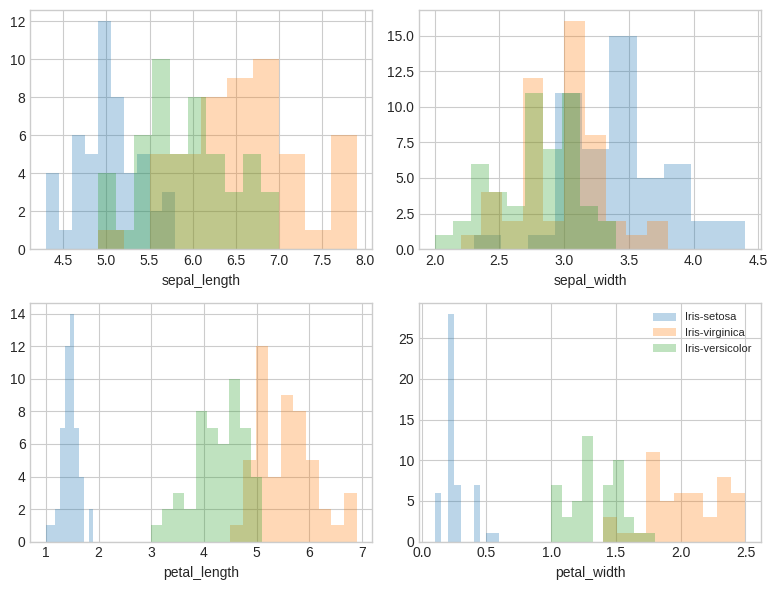

In [8]:
label_dict={1: 'Iris-setosa',
           2: 'Iris-virginica',
           3: 'Iris-versicolor'}
feature_dict={0: 'sepal_length',1: 'sepal_width',2: 'petal_length',3: 'petal_width'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for i in range(4):
        plt.subplot(2,2,i+1)
        for lab in ('Iris-setosa','Iris-virginica','Iris-versicolor'):
            plt.hist(X[y==lab, i],
                    label=lab,
                    bins=10,
                    alpha=0.3)
        plt.xlabel(feature_dict[i])
    plt.legend(loc='upper right', fancybox=True,fontsize=8)
    
    plt.tight_layout()
    plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

In [10]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
print("Covariance Matrix \n%s" %cov_mat)

Covariance Matrix 
[[ 1.00334448 -0.11385853  0.87466949  0.82068276]
 [-0.11385853  1.00334448 -0.42590552 -0.36254685]
 [ 0.87466949 -0.42590552  1.00334448  0.9660308 ]
 [ 0.82068276 -0.36254685  0.9660308   1.00334448]]


In [11]:
print("Numpy Covariance matrix \n%s" %np.cov(X_std.T))

Numpy Covariance matrix 
[[ 1.00334448 -0.11385853  0.87466949  0.82068276]
 [-0.11385853  1.00334448 -0.42590552 -0.36254685]
 [ 0.87466949 -0.42590552  1.00334448  0.9660308 ]
 [ 0.82068276 -0.36254685  0.9660308   1.00334448]]


In [12]:
cov_mat=np.cov(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(cov_mat)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52171778 -0.37486813 -0.72029777  0.26164013]
 [-0.26636854 -0.9244304   0.24319552 -0.12382316]
 [ 0.58083504 -0.02280557  0.14150831 -0.80130267]
 [ 0.56523359 -0.06619834  0.63403664  0.52357072]]
Eigenvelues 
[2.92439167 0.92070445 0.14755111 0.02073069]


In [13]:
corr_mat1=np.corrcoef(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(corr_mat1)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52171778 -0.37486813 -0.72029777  0.26164013]
 [-0.26636854 -0.9244304   0.24319552 -0.12382316]
 [ 0.58083504 -0.02280557  0.14150831 -0.80130267]
 [ 0.56523359 -0.06619834  0.63403664  0.52357072]]
Eigenvelues 
[2.9146437  0.91763544 0.14705928 0.02066158]


In [14]:
cor_mat2=np.corrcoef(X.T)
eig_vals, eig_vecs=np.linalg.eig(cor_mat2)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52171778 -0.37486813 -0.72029777  0.26164013]
 [-0.26636854 -0.9244304   0.24319552 -0.12382316]
 [ 0.58083504 -0.02280557  0.14150831 -0.80130267]
 [ 0.56523359 -0.06619834  0.63403664  0.52357072]]
Eigenvelues 
[2.9146437  0.91763544 0.14705928 0.02066158]


In [15]:
u, s, v=np.linalg.svd(X_std.T)
u

array([[-0.52171778, -0.37486813,  0.72029777,  0.26164013],
       [ 0.26636854, -0.9244304 , -0.24319552, -0.12382316],
       [-0.58083504, -0.02280557, -0.14150831, -0.80130267],
       [-0.56523359, -0.06619834, -0.63403664,  0.52357072]])

In [16]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print("Everithing is ok")

Everithing is ok


In [17]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.914643702203565
0.9176354378175842
0.14705927550261844
0.020661584476230434


In [18]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

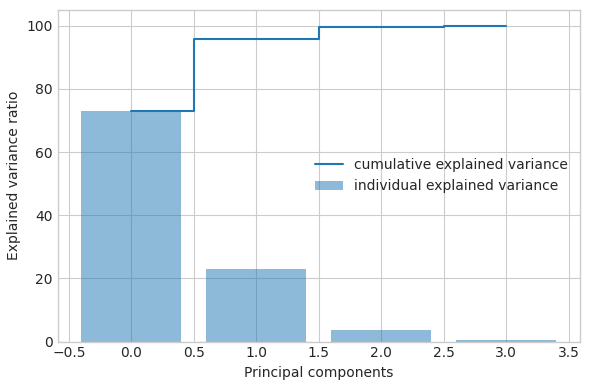

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [20]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52171778 -0.37486813]
 [-0.26636854 -0.9244304 ]
 [ 0.58083504 -0.02280557]
 [ 0.56523359 -0.06619834]]


In [21]:
Y = X_std.dot(matrix_w)

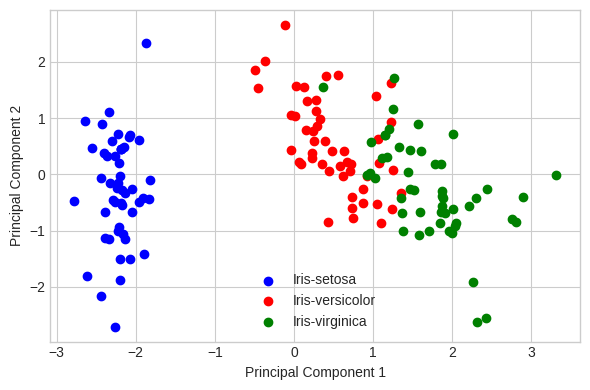

In [22]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [23]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

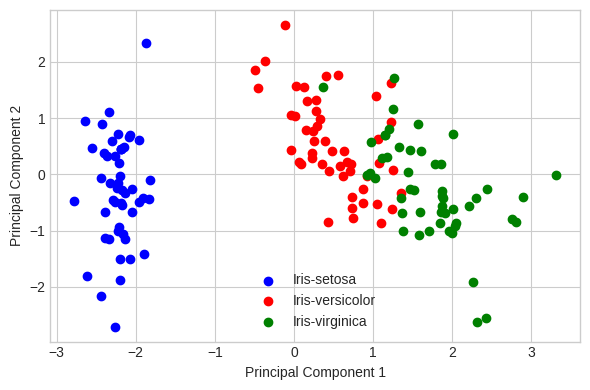

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [25]:
data=pd.DataFrame(Y_sklearn)
data.columns=['PC1','PC2']
data

,PC1,PC2
0,-2.264652,0.492794
1,-2.083700,-0.664823
2,-2.366105,-0.330254
3,-2.301801,-0.586438
4,-2.389345,0.660727
...,...,...
295,1.870506,0.384920
296,1.561554,-0.900968
297,1.521002,0.267951
298,1.374565,1.013822


In [26]:
data['class']=df['class']
data

,PC1,PC2,class
0,-2.264652,0.492794,Iris-setosa
1,-2.083700,-0.664823,Iris-setosa
2,-2.366105,-0.330254,Iris-setosa
3,-2.301801,-0.586438,Iris-setosa
4,-2.389345,0.660727,Iris-setosa
...,...,...,...
295,1.870506,0.384920,Virginica
296,1.561554,-0.900968,Virginica
297,1.521002,0.267951,Virginica
298,1.374565,1.013822,Virginica


In [27]:
dataset =data
X = dataset.iloc[:,:2].values
y = dataset['class'].values
dataset.head(5)

,PC1,PC2,class
0,-2.264652,0.492794,Iris-setosa
1,-2.083700,-0.664823,Iris-setosa
2,-2.366105,-0.330254,Iris-setosa
3,-2.301801,-0.586438,Iris-setosa
4,-2.389345,0.660727,Iris-setosa


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred = classifier.predict(X_test) 
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Setosa', 'Setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Setosa', 'Iris-versicolor',
       'Versicolor', 'Versicolor', 'Setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Setosa',
       'Virginica', 'Iris-virginica', 'Setosa', 'Iris-versicolor',
       'Setosa', 'Iris-setosa', 'Iris-setosa', 'Setosa',
       'Iris-versicolor', 'Versicolor', 'Setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Versicolor', 'Iris-virginica',
       'Iris-virginica', 'Versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Virginica', 'Versicolor', 'Setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iri

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.36666666666666664


array([[ 3,  0,  0,  7,  0,  0],
       [ 0,  7,  2,  0,  3,  0],
       [ 0,  0,  4,  0,  1,  2],
       [ 4,  0,  0,  5,  0,  0],
       [ 0, 11,  1,  0,  2,  0],
       [ 0,  0,  7,  0,  0,  1]])